### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
data_train = pd.read_csv('UNSW_Training.csv')
data_test = pd.read_csv('UNSW_Testing.csv')

In [4]:
data_train.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934817 entries, 0 to 2934816
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 425.4+ MB


In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733705 entries, 0 to 733704
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pkSeqID            733705 non-null  int64  
 1   proto              733705 non-null  object 
 2   saddr              733705 non-null  object 
 3   sport              733705 non-null  object 
 4   daddr              733705 non-null  object 
 5   dport              733705 non-null  object 
 6   seq                733705 non-null  int64  
 7   stddev             733705 non-null  float64
 8   N_IN_Conn_P_SrcIP  733705 non-null  int64  
 9   min                733705 non-null  float64
 10  state_number       733705 non-null  int64  
 11  mean               733705 non-null  float64
 12  N_IN_Conn_P_DstIP  733705 non-null  int64  
 13  drate              733705 non-null  float64
 14  srate              733705 non-null  float64
 15  max                733705 non-null  float64
 16  at

In [6]:
data_train.shape

(2934817, 19)

### Preprocessing

In [7]:
data_train.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [8]:
data_test.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

No null values are present in both training and testing dataset

In [9]:
#Exploring object data types
data_train.dtypes[data_train.dtypes=='object']

proto          object
saddr          object
sport          object
daddr          object
dport          object
category       object
subcategory    object
dtype: object

In [10]:
data_train['subcategory'].value_counts()

UDP                  1584650
TCP                  1274843
Service_Scan           58626
OS_Fingerprint         14293
HTTP                    1970
Normal                   370
Keylogging                59
Data_Exfiltration          6
Name: subcategory, dtype: int64

In [11]:
#Dropping columns from both the dataset as they are not important to get our target values
data_train.drop(["pkSeqID","seq","subcategory"], axis=1, inplace=True)
data_test.drop(["pkSeqID","seq","subcategory"], axis=1, inplace=True)

In [12]:
data_train['category'].value_counts()

DDoS              1541315
DoS               1320148
Reconnaissance      72919
Normal                370
Theft                  65
Name: category, dtype: int64

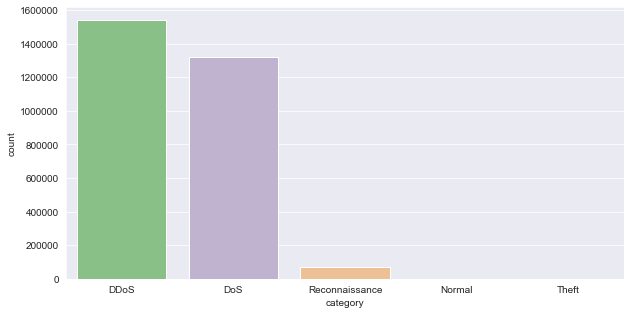

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data_train['category'],palette='Accent')

As we can see from the values and plot of category, the number of thefts case is very very less as compared to other attacks so we will drop it from the dataset.  
Also the values of normal (no attack) is also very less but we will keep it as it is the number of times there were no attack.

In [14]:
data_test['category'].value_counts()

DDoS              385309
DoS               330112
Reconnaissance     18163
Normal               107
Theft                 14
Name: category, dtype: int64

In [15]:
indexNames = data_train[data_train['category']=='Theft'].index
data_train.drop(indexNames , inplace=True)

In [16]:
indexNames = data_test[data_test['category']=='Theft'].index
data_test.drop(indexNames , inplace=True)

In [17]:
data_train['category'].value_counts()

DDoS              1541315
DoS               1320148
Reconnaissance      72919
Normal                370
Name: category, dtype: int64

In [18]:
data_train['proto'].value_counts()

udp          1596819
tcp          1330536
icmp            7228
arp              163
ipv6-icmp          6
Name: proto, dtype: int64

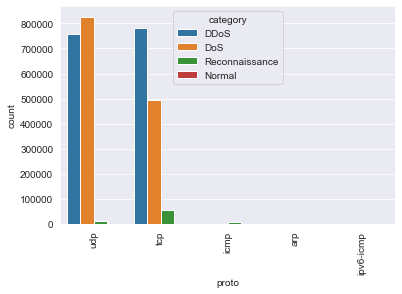

In [19]:
plt.xticks(rotation=90)
sns.countplot(data_train['proto'],hue=data_train['category'])

In [20]:
data_train['saddr'].value_counts()

192.168.100.147              761360
192.168.100.148              738642
192.168.100.150              712238
192.168.100.149              711465
192.168.100.3                  6567
192.168.100.5                  4107
192.168.100.6                   272
192.168.100.7                    34
192.168.100.4                    17
192.168.100.1                    14
192.168.100.27                    9
192.168.100.46                    8
fe80::250:56ff:febe:254           5
192.168.100.55                    3
fe80::250:56ff:febe:26db          2
fe80::250:56ff:febe:89ee          2
fe80::c0c0:aa20:45b9:bdd9         2
fe80::250:56ff:febe:c038          2
fe80::2c6a:ff9b:7e14:166a         2
fe80::250:56ff:febe:e9d9          1
Name: saddr, dtype: int64

In [21]:
data_train['saddr'].nunique()

20

In [22]:
data_train['daddr'].value_counts()

192.168.100.3      1900540
192.168.100.5       361192
192.168.100.7       332161
192.168.100.6       329678
192.168.100.150       3018
                    ...   
205.251.194.201          1
216.239.36.10            1
205.251.199.61           1
205.251.196.160          1
205.251.194.102          1
Name: daddr, Length: 81, dtype: int64

In [23]:
data_train['sport'].value_counts()

0x0303    7156
80        3220
1822       878
60541      869
1216       868
          ... 
39364       31
18992       30
39305       30
0x000d      10
0x0011       8
Name: sport, Length: 65541, dtype: int64

In [24]:
check='0x'
s_res = set([i for i in data_train['sport'] if i.startswith(check)])
s_res

{'0x0008', '0x000d', '0x0011', '0x0303'}

Some of the values in source port (sport) are in Hexadecimal form, since they are low in number we will directly replace them with their corresponding Decimal form

In [25]:
data_train['sport']=data_train['sport'].replace(['0x0303'],'771') 
data_train['sport']=data_train['sport'].replace(['0x0011'],'17')
data_train['sport']=data_train['sport'].replace(['0x000d'],'13')
data_train['sport']=data_train['sport'].replace(['0x0008'],'8')

In [26]:
data_test['sport']=data_test['sport'].replace(['0x0303'],'771') 
data_test['sport']=data_test['sport'].replace(['0x0011'],'17')
data_test['sport']=data_test['sport'].replace(['0x000d'],'13')
data_test['sport']=data_test['sport'].replace(['0x0008'],'8')

In [27]:
#Converting object datatype to int datatype
data_train["sport"] = data_train["sport"].astype(str).astype(int)
data_test["sport"] = data_test["sport"].astype(str).astype(int)

In [28]:
data_train['dport'].value_counts()

80       2858794
1           5379
3306        3757
53           275
-1           163
          ...   
8823           1
30601          1
9559           1
39331          1
30579          1
Name: dport, Length: 6906, dtype: int64

In [29]:
check='0x'
d_res = set([i for i in data_train['dport'] if i.startswith(check)])
print(len(d_res))

1062


Some of the values in destination port (sport) are in Hexadecimal form, since they are high in number we will create a function to replace those values with their corresponding Decimal values

In [30]:
data_train["dport"] = data_train["dport"].apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))
data_test["dport"] = data_test["dport"].apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))

### Encoding Categorical columns

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train["saddr_enc"]= le.fit_transform(data_train.saddr)
data_train["daddr_enc"]= le.fit_transform(data_train.daddr)
data_train["proto_enc"]= le.fit_transform(data_train.proto)
data_train["category_enc"]= le.fit_transform(data_train.category)

In [32]:
data_train.head()

,proto,saddr,sport,daddr,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,saddr_enc,daddr_enc,proto_enc,category_enc
0,udp,192.168.100.150,6551,192.168.100.3,80,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,4,15,4,0
1,tcp,192.168.100.150,5532,192.168.100.3,80,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,4,15,3,0
2,tcp,192.168.100.147,27165,192.168.100.3,80,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,1,15,3,0
3,udp,192.168.100.150,48719,192.168.100.3,80,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,4,15,4,1
4,udp,192.168.100.147,22461,192.168.100.3,80,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,1,15,4,0


In [33]:
# Dropping Redundant Columns
data_train.drop(['saddr','daddr','proto','category'], axis=1, inplace=True)

In [34]:
data_test["saddr_enc"]= le.fit_transform(data_test.saddr)
data_test["daddr_enc"]= le.fit_transform(data_test.daddr)
data_test["proto_enc"]= le.fit_transform(data_test.proto)
data_test["category_enc"]= le.fit_transform(data_test.category)
data_test.drop(['saddr','daddr','proto','category'], axis=1, inplace=True)

In [35]:
data_train['category_enc'].value_counts()

0    1541315
1    1320148
3      72919
2        370
Name: category_enc, dtype: int64

0 - DDoS  
1 - DoS  
3 - Reconnaissance  
2 - Normal

In [36]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2934752 entries, 0 to 2934816
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sport              int32  
 1   dport              int64  
 2   stddev             float64
 3   N_IN_Conn_P_SrcIP  int64  
 4   min                float64
 5   state_number       int64  
 6   mean               float64
 7   N_IN_Conn_P_DstIP  int64  
 8   drate              float64
 9   srate              float64
 10  max                float64
 11  attack             int64  
 12  saddr_enc          int32  
 13  daddr_enc          int32  
 14  proto_enc          int32  
 15  category_enc       int32  
dtypes: float64(6), int32(5), int64(5)
memory usage: 324.7 MB


### Scaling

In [37]:
y_train=data_train["category_enc"]
y_test=data_test["category_enc"]

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features = data_train.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
data_train= pd.DataFrame(scaled_features,columns=cols)

In [39]:
features = data_test.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
data_test= pd.DataFrame(scaled_features,columns=cols)

In [40]:
data_train.head()

,sport,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,saddr_enc,daddr_enc,proto_enc
0,-1.380796,-0.094028,1.260991,0.715435,-0.685661,0.729327,0.301113,0.415159,-0.00763,-0.003355,0.543986,0.011229,1.301786,-0.638504,0.897321
1,-1.434107,-0.094028,-1.006649,-1.826659,1.914132,-0.113083,1.122991,0.415159,-0.00763,-0.003659,0.533940,0.011229,1.301786,-0.638504,-1.049199
2,-0.302346,-0.094028,-0.769399,0.715435,1.319054,-0.113083,0.731954,0.415159,-0.00763,-0.003610,0.316991,0.011229,-1.281470,-0.638504,-1.049199
3,0.825282,-0.094028,1.164956,-0.801621,-0.685661,0.729327,0.653814,-1.621898,-0.00763,-0.003397,1.033365,0.011229,1.301786,-0.638504,0.897321
4,-0.548442,-0.094028,-0.080342,0.715435,1.323028,0.729327,1.154811,0.415159,-0.00763,-0.002707,1.061389,0.011229,-1.281470,-0.638504,0.897321


In [41]:
y_train.value_counts()

0    1541315
1    1320148
3      72919
2        370
Name: category_enc, dtype: int64

In [42]:
X_train = data_train
X_test = data_test

In [43]:
X_train.head()

,sport,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,saddr_enc,daddr_enc,proto_enc
0,-1.380796,-0.094028,1.260991,0.715435,-0.685661,0.729327,0.301113,0.415159,-0.00763,-0.003355,0.543986,0.011229,1.301786,-0.638504,0.897321
1,-1.434107,-0.094028,-1.006649,-1.826659,1.914132,-0.113083,1.122991,0.415159,-0.00763,-0.003659,0.533940,0.011229,1.301786,-0.638504,-1.049199
2,-0.302346,-0.094028,-0.769399,0.715435,1.319054,-0.113083,0.731954,0.415159,-0.00763,-0.003610,0.316991,0.011229,-1.281470,-0.638504,-1.049199
3,0.825282,-0.094028,1.164956,-0.801621,-0.685661,0.729327,0.653814,-1.621898,-0.00763,-0.003397,1.033365,0.011229,1.301786,-0.638504,0.897321
4,-0.548442,-0.094028,-0.080342,0.715435,1.323028,0.729327,1.154811,0.415159,-0.00763,-0.002707,1.061389,0.011229,-1.281470,-0.638504,0.897321


### Sampling

In [44]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0:72919, 1:72919, 3:72919, 2:370}
random_under= RandomUnderSampler(sampling_strategy=samp_strat,random_state=1)
X_rus,y_rus = random_under.fit_resample(X_train,y_train)

In [45]:
y_rus.value_counts()

3    72919
1    72919
0    72919
2      370
Name: category_enc, dtype: int64

In [46]:
from imblearn.over_sampling import RandomOverSampler
samp_strat= { 0:72919, 1:72919, 2:72919, 3:72919}
random_under= RandomOverSampler(sampling_strategy=samp_strat,random_state=1)
Xres,yres = random_under.fit_resample(X_rus,y_rus)

In [47]:
yres.value_counts()

3    72919
2    72919
1    72919
0    72919
Name: category_enc, dtype: int64

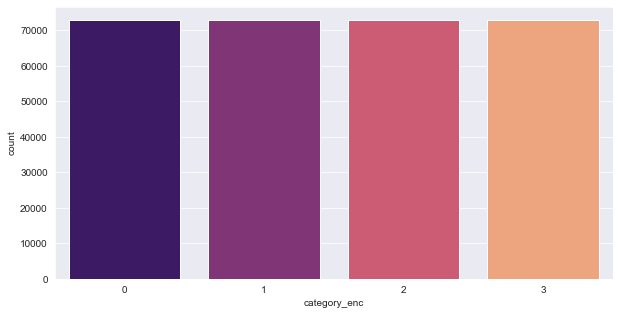

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(yres,palette='magma')

### XGBoost Model

In [49]:
from xgboost import XGBClassifier
model_1 = XGBClassifier(random_state = 42)
model_1.fit(Xres, yres)
pred_1 = model_1.predict(X_test)
score1 = model_1.score(X_test,y_test)
print("Accuracy of base model: ",score1)

Accuracy of base model:  0.6174602114514148


In [87]:
# from xgboost import plot_tree
# plot_tree(model_1)
# plt.show()

We need to tune our model by Hyperparameter Tuning so as to get better accuracy.

### HyperParameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

In [52]:
 params={'max_depth':[5], 'n_estimators': [200,300,400],
            'learning_rate': [0.15,0.20], 'subsample':[0.3,0.5,0.7]}

In [53]:
model_2 = GridSearchCV(XGBClassifier(),params,refit=True,verbose=3)

In [55]:
model_2.fit(Xres,yres)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3, score=1.000, total=  39.6s
[CV] learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.5s remaining:    0.0s


[CV]  learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3, score=1.000, total=  40.3s
[CV] learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s


[CV]  learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3, score=1.000, total=  43.1s
[CV] learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3, score=1.000, total=  44.6s
[CV] learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3, score=1.000, total=  44.8s
[CV] learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  54.0s
[CV] learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  54.8s
[CV] learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  55.1s
[CV] learning_rate=0.15, max_depth=5, n_estimators=

[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  47.2s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  46.7s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  44.5s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  44.5s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7, score=1.000, total=  47.3s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7, score=1.000, total=  47.6s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, su

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 95.3min finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [56]:
model_2.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}

In [57]:
model_2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
pred_2 = model_2.predict(X_test)

In [59]:
score_2 = model_2.score(X_test,y_test)
print("Accuracy of 1st test model: ",score_2*100)

Accuracy of 1st test model:  81.8871977440094


In [60]:
params_new={'max_depth':[4], 'n_estimators': [200,300],
           'learning_rate': [0.05,0.1], 'subsample':[0.5,0.7]}

In [62]:
model_3 = GridSearchCV(XGBClassifier(),params_new,refit=True,verbose=3,
                       n_jobs=-1)

In [63]:
model_3.fit(Xres,yres)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed: 15.0min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 19.2min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [68]:
model_3.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.7}

In [69]:
model_3.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
pred_3 = model_3.predict(X_test)

In [71]:
score_3 = model_3.score(X_test,y_test)
print("Accuracy of 2nd test model: ",score_3*100)

Accuracy of 2nd test model:  72.12177878698253


In [72]:
params_4 = {'max_depth':[5], 'n_estimators': [200,300,500],
            'learning_rate': [0.20,0.30], 'subsample':[0.5,0.6,0.7]}
model_4 = GridSearchCV(XGBClassifier(),params_4,refit=True,verbose=3,
                       cv=3,n_jobs=-1)
model_4.fit(Xres,yres)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 59.8min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [73]:
model_4.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}

In [75]:
model_4.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
pred_4 = model_4.predict(X_test)

In [78]:
score_4 = model_4.score(X_test,y_test)
print("Accuracy of 3rd test model: ",score_4*100)

Accuracy of 3rd test model:  67.00722783842245


In [79]:
 params_5={'max_depth':[5,6], 'n_estimators': [200,300],
            'learning_rate': [0.20], 'subsample':[0.5,0.7,0.9]}

In [80]:
model_5 = GridSearchCV(XGBClassifier(),params_5,refit=True,verbose=3)

In [81]:
model_5.fit(Xres,yres)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total= 1.0min
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5 .


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.9s remaining:    0.0s


[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  56.2s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5 .


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s


[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  56.8s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total= 1.1min
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  56.3s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7, score=1.000, total=  58.1s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7, score=1.000, total=  56.4s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7, score=1.000, total=  59.9s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, su

[CV]  learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.7, score=1.000, total= 1.2min
[CV] learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.7 .
[CV]  learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.7, score=1.000, total= 1.2min
[CV] learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.7 .
[CV]  learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.7, score=1.000, total= 1.2min
[CV] learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.7 .
[CV]  learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.7, score=1.000, total= 1.2min
[CV] learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.9 .
[CV]  learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.9, score=1.000, total= 1.3min
[CV] learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.9 .
[CV]  learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.9, score=1.000, total= 1.3min
[CV] learning_rate=0.2, max_depth=6, n_estimators=300, su

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 66.3min finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [82]:
model_5.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}

In [83]:
model_5.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
pred_5 = model_5.predict(X_test)

In [86]:
score_5 = model_5.score(X_test,y_test)
print("Accuracy of 4th test model: ",score_5*100)

Accuracy of 4th test model:  81.8871977440094


In [87]:
params_6 = {'max_depth':[5], 'n_estimators': [200,300,500],
            'learning_rate': [0.20,0.30], 'subsample':[0.5,0.6,0.7]}
model_6 = GridSearchCV(XGBClassifier(),params_4,refit=True,verbose=3,
                       cv=5,n_jobs=-1)
model_6.fit(Xres,yres)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 109.4min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [88]:
model_6.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.6}

In [89]:
model_6.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
pred_6 = model_6.predict(X_test)

In [92]:
score_6 = model_6.score(X_test,y_test)
print("Accuracy of 5th model: ",score_6*100)

Accuracy of 5th model:  90.48741227574007


In [97]:
print("Results of various Parameter tuned models ")
print("Base model 0: ",round(score1*100,2),"%")
print("Test model 1: ",round(score_2*100,2),"%")
print("Test model 2: ",round(score_3*100,2),"%")
print("Test model 3: ",round(score_4*100,2),"%")
print("Test model 4: ",round(score_5*100,2),"%")
print("Test model 5: ",round(score_6*100,2),"%")

Results of various Parameter tuned models 
Base model 0:  61.75 %
Test model 1:  81.89 %
Test model 2:  72.12 %
Test model 3:  67.01 %
Test model 4:  81.89 %
Test model 5:  90.49 %


So after hyperparameter tuning, Accuracy has increased from 61.75% to 90.49%.  

### K Fold Cross Validation

In [128]:
# from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score
# def evaluate_model(model):
    
#     KF=KFold(n_splits=10,shuffle=True,random_state=42)
#     score1 = cross_val_score(model, Xres, yres, scoring='accuracy', cv=KF)
    
#     SKF= StratifiedKFold(n_splits=10,shuffle=True)
#     score2 = cross_val_score(model, Xres, yres, scoring='accuracy', cv=SKF)
    
#     list_scores=[np.mean(score1),np.mean(score2)]
    
#     return list_scores


In [130]:
# names=["KFold","Stratified KFold"]
# print("KFOLD CROSS VALIDATION SCORES")
# print("(For Base Model 0)")
# scores_k1 = evaluate_model(model_1)

# for (i,j) in zip(scores_k1,names):
#     print(j,"-",round(i*100,2),'%')
   

### Results

In [117]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score
from sklearn import metrics


In [121]:
print("Results of various Parameter tuned models ")
print("Base model 0: ",round(score1*100,2),"%")
print("Test model 1: ",round(score_2*100,2),"%")
print("Test model 2: ",round(score_3*100,2),"%")
print("Test model 3: ",round(score_4*100,2),"%")
print("Test model 4: ",round(score_5*100,2),"%")
print("Test model 5: ",round(score_6*100,2),"%")

Results of various Parameter tuned models 
Base model 0:  61.75 %
Test model 1:  81.89 %
Test model 2:  72.12 %
Test model 3:  67.01 %
Test model 4:  81.89 %
Test model 5:  90.49 %


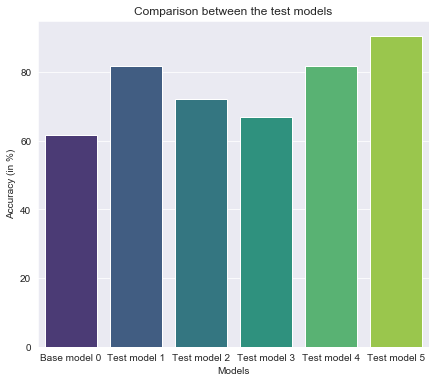

In [150]:
plt.figure(figsize=(7,6))
results = [score1*100,score_2*100,score_3*100,score_4*100,score_5*100,score_6*100]
model_names = ['Base model 0','Test model 1','Test model 2','Test model 3','Test model 4', 'Test model 5']
sns.barplot(x = model_names, y=results, palette='viridis')
plt.xlabel('Models')
plt.ylabel('Accuracy (in %)')
plt.title('Comparison between the test models')
plt.show()

In [123]:
print(confusion_matrix(y_test,pred_6))

[[378939   1481      0   4889]
 [   181 266694      0  63237]
 [     0      0    107      0]
 [     5      0      0  18158]]


In [119]:
# Classification Report of tuned model (Test Model 5)
print(classification_report(y_test,pred_6))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    385309
           1       0.99      0.81      0.89    330112
           2       1.00      1.00      1.00       107
           3       0.21      1.00      0.35     18163

    accuracy                           0.90    733691
   macro avg       0.80      0.95      0.81    733691
weighted avg       0.98      0.90      0.93    733691



##### Inferences from the report:  
 - Recall of the model is 0.90, i.e. 90% of the predicted vaues were true(1).
 - Precision of the model is 0.98, i.e. 98% of the predicted true values were correct.
 - F1-Score is also pretty high, 0.93 that means the precision and recall of our model is high.


In [124]:
print(confusion_matrix(y_test,pred_1))

[[381229    647      0   3433]
 [   457  53532      0 276123]
 [     0      0    107      0]
 [     5      1      0  18157]]


In [120]:
# Classification Report of base model
print(classification_report(y_test,pred_1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    385309
           1       0.99      0.16      0.28    330112
           2       1.00      1.00      1.00       107
           3       0.06      1.00      0.11     18163

    accuracy                           0.62    733691
   macro avg       0.76      0.79      0.60    733691
weighted avg       0.97      0.62      0.65    733691



##### Inferences from the report:  
 - Recall of the model is 0.62, i.e. 62% of the predicted vaues were true(1).
 - Precision of the model is 0.97, i.e. 97% of the predicted true values were correct.
 - F1 score is not very high, 0.65 this is due to low recall.
